[View in Colaboratory](https://colab.research.google.com/github/Shreyas3108/Multipath-selection-using-ML/blob/master/TreeClass.ipynb)

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving multipath.csv to multipath.csv
User uploaded file "multipath.csv" with length 25125562 bytes


In [3]:
!ls

datalab  multipath.csv


In [0]:
import seaborn as sns

In [0]:
import pandas as pd 
import numpy as np 

In [0]:
data = pd.read_csv('multipath.csv')

In [6]:
data.head()

,name,time,EncodingPath,Producer,bandwidth,input-data-rate,input-load,input-packet-rate,interface-name,load-interval,output-data-rate,output-load,output-packet-rate,reliability,peak-input-data-rate,peak-output-data-rate,peak-input-packet-rate,peak-output-packet-rate,delay,infname
0,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007733000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,7214502.0,18.0,639356.0,HundredGigE0/0/0/4,0.0,12225031.0,31.0,1080487.0,255.0,0.0,0.0,0.0,0.0,0,True
1,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007735000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,6564805.0,16.0,598775.0,HundredGigE0/0/0/5,0.0,11132639.0,28.0,980453.0,255.0,0.0,0.0,0.0,0.0,7,True
2,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007738000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,13838151.0,35.0,1217949.0,HundredGigE0/0/0/6,0.0,9664580.0,24.0,856189.0,255.0,0.0,0.0,0.0,0.0,3,True
3,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007740000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,10752468.0,27.0,968818.0,HundredGigE0/0/0/7,0.0,13502426.0,34.0,1146930.0,255.0,0.0,0.0,0.0,0.0,0,True
4,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007742000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,6925863.0,17.0,605078.0,HundredGigE0/0/0/8,0.0,12163551.0,31.0,1055221.0,255.0,0.0,0.0,0.0,0.0,8,True


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
data['path'] = le.fit_transform(data['interface-name'])

In [0]:
data = pd.get_dummies(data , columns= ['Producer'])

In [11]:
data.head()

,name,time,EncodingPath,bandwidth,input-data-rate,input-load,input-packet-rate,interface-name,load-interval,output-data-rate,...,Producer_leaf3,Producer_leaf4,Producer_leaf5,Producer_leaf6,Producer_leaf7,Producer_leaf8,Producer_spine1,Producer_spine2,Producer_spine3,Producer_spine4
0,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007733000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,7214502.0,18.0,639356.0,HundredGigE0/0/0/4,0.0,12225031.0,...,0,0,0,0,0,0,0,0,0,0
1,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007735000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,6564805.0,16.0,598775.0,HundredGigE0/0/0/5,0.0,11132639.0,...,0,0,0,0,0,0,0,0,0,0
2,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007738000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,13838151.0,35.0,1217949.0,HundredGigE0/0/0/6,0.0,9664580.0,...,0,0,0,0,0,0,0,0,0,0
3,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007740000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,10752468.0,27.0,968818.0,HundredGigE0/0/0/7,0.0,13502426.0,...,0,0,0,0,0,0,0,0,0,0
4,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007742000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,6925863.0,17.0,605078.0,HundredGigE0/0/0/8,0.0,12163551.0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


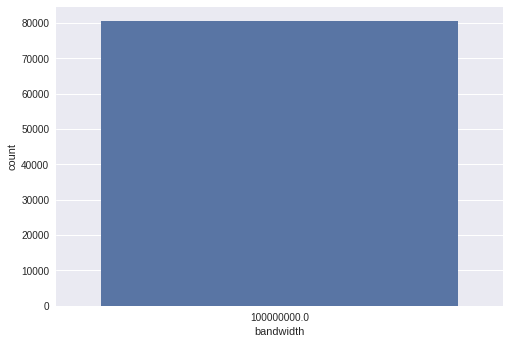

In [12]:
sns.countplot(x = 'bandwidth',data = data)

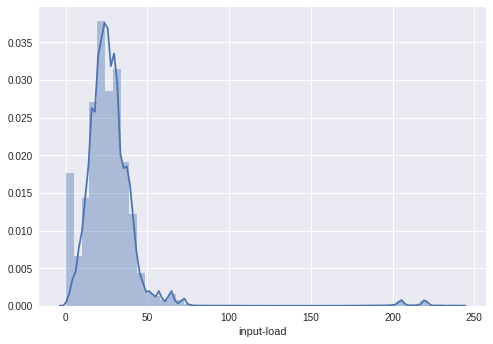

In [16]:
sns.distplot(data['input-load'])

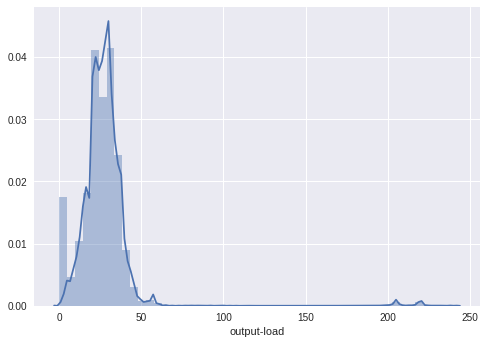

In [20]:
sns.distplot(data['output-load'])

In [0]:
inp = data[['bandwidth','input-data-rate','input-load','load-interval','output-data-rate','output-load',
            'output-packet-rate','reliability','peak-input-data-rate','peak-output-data-rate'
           ,'peak-input-packet-rate', 'peak-output-packet-rate', 'delay','Producer_leaf1', 
            'Producer_leaf2', 'Producer_leaf3', 'Producer_leaf4','Producer_leaf5',
            'Producer_leaf6', 'Producer_leaf7', 'Producer_leaf8',
           'Producer_spine1', 'Producer_spine2', 'Producer_spine3',
           'Producer_spine4']] 
out = data['path']

In [22]:
from sklearn.cross_validation import train_test_split
x_train , y_train , x_test , y_test = train_test_split(inp , out , test_size = 0.3)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [36]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score , confusion_matrix

mod = DecisionTreeClassifier() 

mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
print(y_pred * 100)

77.49544777354743


In [0]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test , pred)

('Accuracy Score : ', 77.49544777354743)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

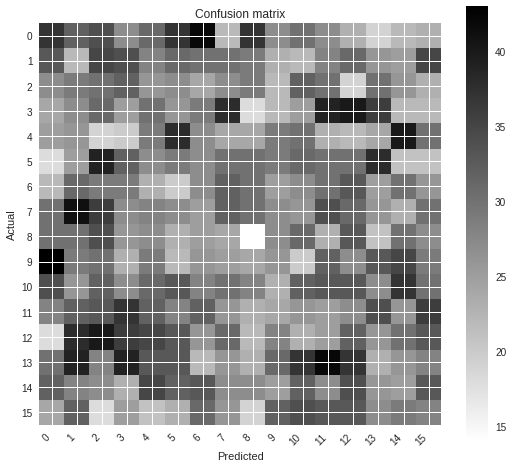

In [44]:
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
mod

('Accuracy Score : ', 77.84307233901671)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=400,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

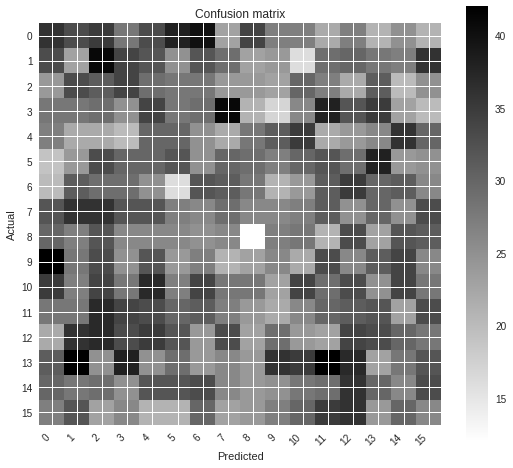

In [46]:
mod = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 400) 

mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
mod

In [0]:
from sklearn.ensemble import RandomForestClassifier

('Accuracy Score : ', 79.25840092699885)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

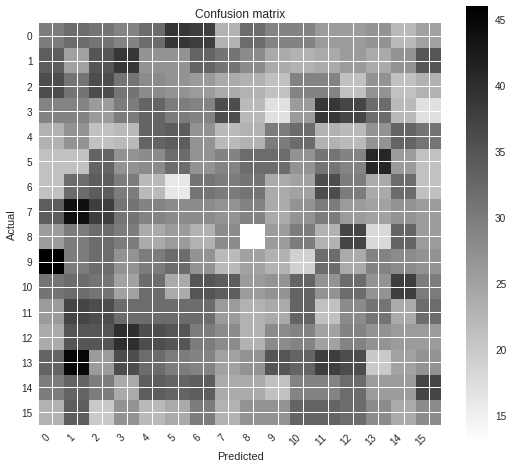

In [50]:
mod2 = RandomForestClassifier()
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
mod2

('Accuracy Score : ', 80.29299784803841)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=400, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

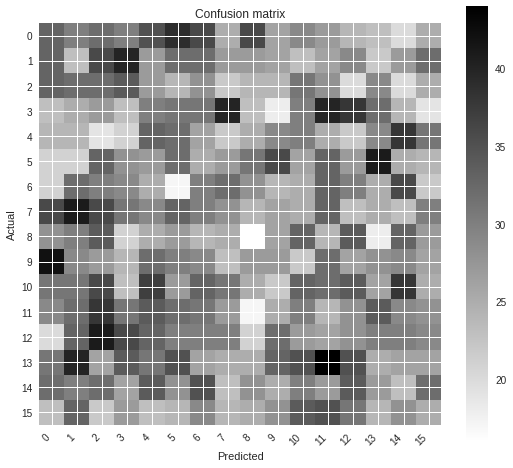

In [51]:
mod2 = RandomForestClassifier(criterion = 'entropy' ,n_estimators = 20 , max_depth= 400 , max_features= 7)
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
mod2

('Accuracy Score : ', 80.6406224135077)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=400, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

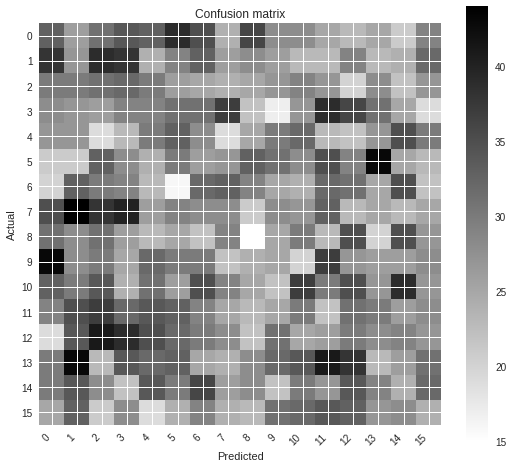

In [53]:
mod2 = RandomForestClassifier(n_estimators = 20 , max_depth = 400 , max_features = 8 )
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
mod2

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

('Accuracy Score : ', 80.50819400761463)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=200, max_features=8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

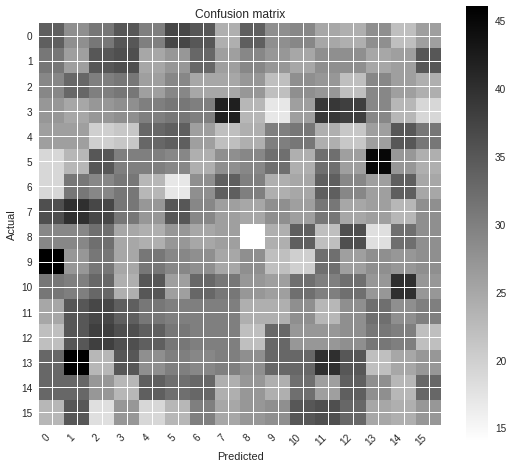

In [56]:
mod3 = ExtraTreesClassifier(n_estimators= 25 , max_depth= 200 , max_features = 8 )
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
mod3

('Accuracy Score : ', 80.6613143519285)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=400, max_features=16, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

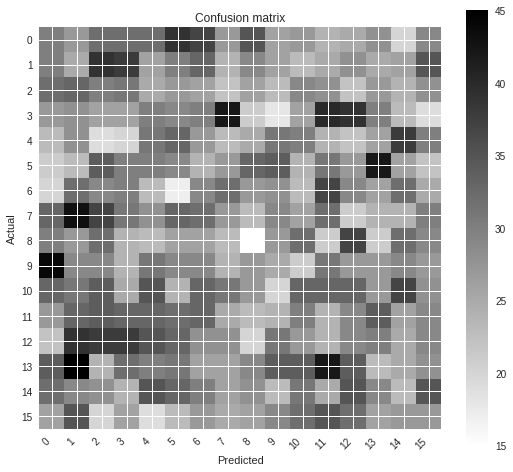

In [59]:
mod3 = ExtraTreesClassifier(criterion = 'entropy' , n_estimators = 25 , max_features = 16 , max_depth = 400)
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
mod3

('Accuracy Score : ', 80.9385863267671)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=400, max_features=16, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

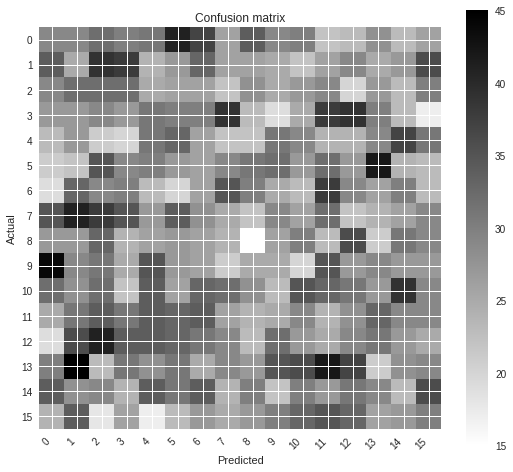

In [61]:
mod3 = ExtraTreesClassifier(n_estimators= 25 , max_depth= 400 , max_features = 16 )
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
mod3

In [0]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
X_train = scaling.transform(x_train)
X_test = scaling.transform(y_train)

In [58]:
svc = SVC()
svc.fit(X_train ,x_test)
pred4 = svc.predict(X_test)
accuracy_score(y_test , pred4)

0.1801853997682503